# Ejemplo de un árbol de decisión

In [17]:
from sklearn.tree import DecisionTreeClassifier #Clasificador del arbol
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris #Se importa el set de datos a trabajar
# Para graficar el arbol 
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [18]:
data = load_iris() #Set de datos en una variable

In [19]:
# Creamos las variables de de prueba y las variables que entrenaran al arbol
X_ent, x_test, Y_ent, y_test = train_test_split(data.data,data.target) 

In [20]:
# Se construye el arbol a aprtir de los datos de entrenamiento
arbol = DecisionTreeClassifier()
arbol.fit(X_ent,Y_ent)

DecisionTreeClassifier()

In [21]:
# Se visualiza la probabilidad de prediccion del arbol con los datos de prueba
arbol.score(x_test,y_test)

0.9473684210526315

In [22]:
# Se visualiza la probabilidad de prediccion del arbol con los datos de entrenamiento
arbol.score(X_ent,Y_ent)

1.0

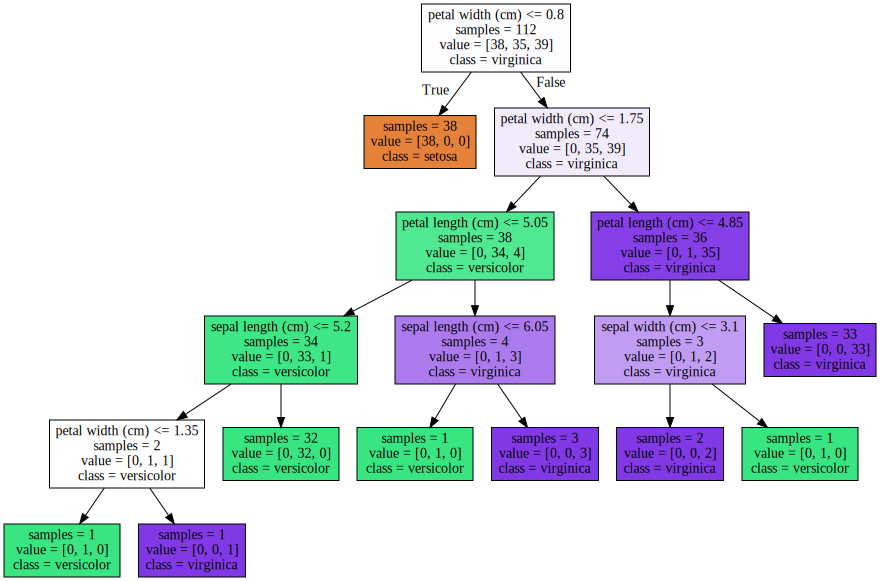

In [23]:
#Se secciona la informacion que tenemos del arbol para poder generar un archivo que nos ayude a visualizar el arbol
export_graphviz(arbol, out_file = "arbol.dot", class_names = data.target_names,feature_names = data.feature_names, impurity = False, filled = True)
# Visualizamos el arbol
with open("arbol.dot") as ad:
    dot_graph = ad.read()
graphviz.Source(dot_graph)

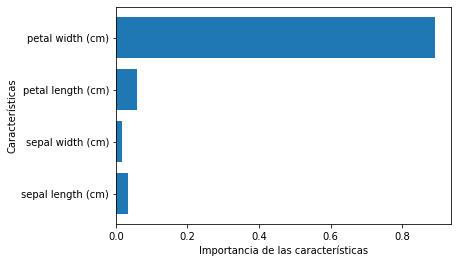

In [24]:
# Importancia de las caracteristicas para ayudar a definir
signf = data.data.shape[1]
plt.barh(range(signf),arbol.feature_importances_)
plt.yticks(np.arange(signf),data.feature_names)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

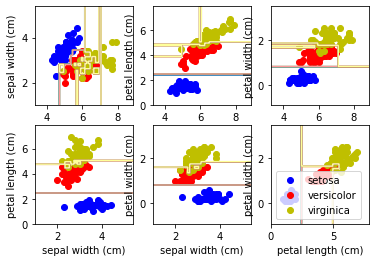

In [25]:
clases = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    x = data.data[:,pair]
    y= data.target
    
    clf = DecisionTreeClassifier().fit(x,y)
    plt.subplot(2,3,pairidx + 1 )
    xmin = x[:, 0].min() - 1
    ymin = x[:, 1].min() - 1
    xmax = x[:, 0].max() + 1
    ymax = x[:, 1].max() + 1
    xl, yl = np.meshgrid(np.arange(xmin,xmax,plot_step),np.arange(ymin,ymax,plot_step))
    plano = clf.predict(np.c_[xl.ravel(),yl.ravel()])
    plano1 = plano.reshape(xl.shape)
    cs = plt.contour(xl, yl, plano1, cmap = plt.cm.Paired )
    
    plt.xlabel(data.feature_names[pair[0]])
    plt.ylabel(data.feature_names[pair[1]])
    plt.axis("tight")
    
    for i, color in zip(range(clases), plot_colors):
        idx = np.where (y == i)
        plt.scatter(x[idx,0],x[idx,1], c = color, label = data.target_names[i], cmap = plt.cm.Paired)
    plt.axis("tight")
 
plt.legend()
plt.show

In [26]:
#Se visualiza la profundidad que tiene el arbol
arbol.tree_.max_depth

5

In [27]:
# Se crea un nuevo arbol con otra profundidad para evitar el sobre ajuste
arbol = DecisionTreeClassifier(max_depth = 3)

In [28]:
arbol.fit(X_ent,Y_ent)

DecisionTreeClassifier(max_depth=3)

In [29]:
arbol.score(x_test, y_test)

0.9736842105263158

In [30]:
arbol.score(X_ent,Y_ent)

0.9732142857142857

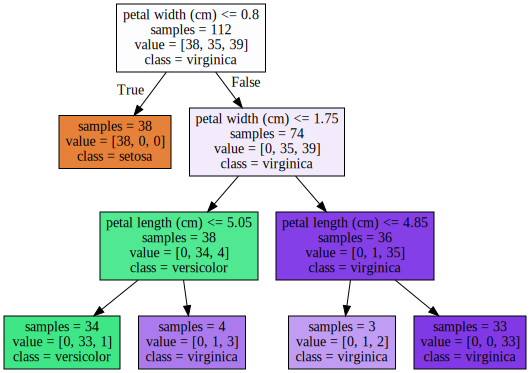

In [31]:
# Se genera la visualizacion del arbol nuevamente
export_graphviz(arbol, out_file = "arbol.dot", class_names = data.target_names,feature_names = data.feature_names, impurity = False, filled = True)

with open("arbol.dot") as ad:
    dot_graph = ad.read()
graphviz.Source(dot_graph)

<function matplotlib.pyplot.show(close=None, block=None)>

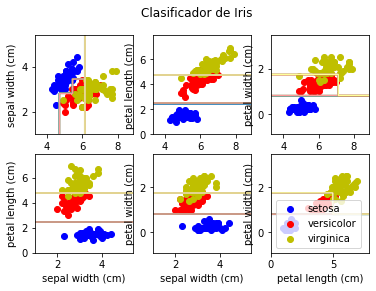

In [32]:
clases = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    x = data.data[:,pair]
    y= data.target
    
    clf = DecisionTreeClassifier(max_depth = 3).fit(x,y)
    plt.subplot(2,3,pairidx + 1 )
    xmin = x[:, 0].min() - 1
    ymin = x[:, 1].min() - 1
    xmax = x[:, 0].max() + 1
    ymax = x[:, 1].max() + 1
    xl, yl = np.meshgrid(np.arange(xmin,xmax,plot_step),np.arange(ymin,ymax,plot_step))
    plano = clf.predict(np.c_[xl.ravel(),yl.ravel()])
    plano1 = plano.reshape(xl.shape)
    cs = plt.contour(xl, yl, plano1, cmap = plt.cm.Paired )
    
    plt.xlabel(data.feature_names[pair[0]])
    plt.ylabel(data.feature_names[pair[1]])
    plt.axis("tight")
    
    for i, color in zip(range(clases), plot_colors):
        idx = np.where (y == i)
        plt.scatter(x[idx,0],x[idx,1], c = color, label = data.target_names[i], cmap = plt.cm.Paired)
    plt.axis("tight")

plt.suptitle("Clasificador de Iris")
plt.legend()
plt.show